<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/5_Pr%C3%A1cticoANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**#


## **Mentoría Diplomatura en Ciencia de Datos 2020** ##

### **"Detección del desarrollo del cultivo con imágenes de Drones"**##


**Mentora: Carolina Del Pilar Díaz**


**Aprendizaje No Automático**


### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiquetados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

### Importaciones

In [2]:
#Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.cm as cm

from plotly.offline import init_notebook_mode, plot,iplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import decomposition
from sklearn import cluster, datasets, mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,MeanShift
from sklearn.preprocessing import StandardScaler, MinMaxScaler

random_state = 0
np.random.seed(0)  # Para mayor determinismo

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.



In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

### Consignas

# 1.Preprocesamiento#

1.1 **Carga Dataset**

Inicialmente con el objetivo de obtener el dataset para los algoritmos de ANS, deberán cargar el dataset original conjunto( incluídas features climáticas)

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/luciozarazaga/Mentoria_Imagenes_Drones_Grupo_2/master/dataframelimpio2.csv')

In [5]:
#Eliminamos del dataset,las columnas Longuitude y Latitude ya que en este trabajo no las vamos a utilizar
#tambien eliminamos las fechas

dataset2=dataset.drop(['Longitude','Latitude', 'Fecha_x','Fecha_y','F_Espigazon','F.Madurez'],axis=1)
dataset2

,RDTO,ZADOCK,F.Siembra,Ciclos,Variedad,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Adversidades,Dias.entre.fechas,Aspecto,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez
0,5071,4.1,0,1,1,61500,15240,67600,37480,15126,0.6343,0.2866,0.9514,0.4518,0.6320,4.4356,4.4691,1.8036,0.5898,0.00375,0.00750,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
1,5071,4.1,0,1,1,51200,12040,56600,32190,14291,0.5968,0.2749,0.8952,0.4606,0.6491,4.7009,3.9605,1.7583,0.5643,-0.08540,-0.16970,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
2,5071,4.1,0,1,1,49200,11100,52800,28610,12364,0.6205,0.2971,0.9307,0.4788,0.6525,4.7567,4.2704,1.8455,0.6127,-0.05380,-0.10740,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
3,5071,4.1,0,1,1,60800,14210,61500,36550,13741,0.6347,0.2544,0.9521,0.4008,0.6246,4.3279,4.4756,1.6826,0.5203,0.01677,0.03354,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
4,5071,4.1,0,1,1,60800,17300,72400,46270,19275,0.5794,0.2201,0.8692,0.3799,0.6142,4.1849,3.7561,1.5647,0.4477,-0.05390,-0.10760,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,4089,6.9,1,0,20,54500,11010,55600,26940,13987,0.5979,0.3472,0.8969,0.5806,0.6694,5.0499,3.9751,2.0638,0.7245,-0.11900,-0.23480,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35066,4089,6.9,1,0,20,72800,14900,91300,38220,17056,0.6851,0.4098,1.0277,0.5981,0.7193,6.1275,5.3529,2.3888,0.8707,-0.06740,-0.13430,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35067,4089,6.9,1,0,20,69200,14480,83100,35950,17149,0.6578,0.3960,0.9868,0.6020,0.7032,5.7389,4.8457,2.3115,0.8379,-0.08430,-0.16750,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35068,4089,6.9,1,0,20,61000,11930,61900,28170,14329,0.6240,0.3744,0.9360,0.6000,0.6768,5.1886,4.3199,2.1973,0.7872,-0.09130,-0.18120,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80


In [6]:
df2_cols= list(dataset2.columns)


In [8]:
dataset2['RDTO'].describe()

count    35070.000000
mean      5329.373795
std       1251.859415
min       2046.000000
25%       4588.000000
50%       5290.000000
75%       6008.000000
max       8725.000000
Name: RDTO, dtype: float64

1.2 **Curación**

Aplicar Script de curación obtenido en el práctico 2

### Cargamos directamente el dataset obtenido del practico 2, ya aplicado el script de curacion


1.3 **Análisis del Balance de Clases**

En una primera instancia, podemos dejar que los algoritmos identifiquen patrones, sin necesidad de preocuparnos por el balance de clases.

En una etapa posterior, y aprovechando que tenemos las etiquetas, aplicarán los mismos algoritmos pero considerando el desbalance de clases en el dataset. Para ello, usar el parámetro sample_weight de k_means. Obtener conclusiones entre ambos resultados.

In [9]:
print(dataset2.shape)
print(pd.value_counts(dataset2['ZADOCK'], sort = True))

(35070, 48)
6.5    4396
6.1    4374
5.9    3477
5.8    3246
6.7    3011
5.7    1904
4.3    1760
6.3    1619
4.7    1572
4.1    1519
5.1    1514
6.6    1491
6.9    1434
4.5     803
3.9     793
5.5     776
5.4     736
5.3     645
Name: ZADOCK, dtype: int64


#### Se observa que si existe un desbalance entre las clases ZADOCK

1.4 **Multicolinealidad Exacta**

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada. 

Dada la particularidad de nuestro dataset, deberían incorporar aquellas que posean la menor cantidad de multicolinealidad en la medida de lo posible (es muy difícil desestimar los índices) pero si podríamos desestimar peso de grano por ejemplo sólo aquellas que sean muy evidentes.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbc785e7588>,)

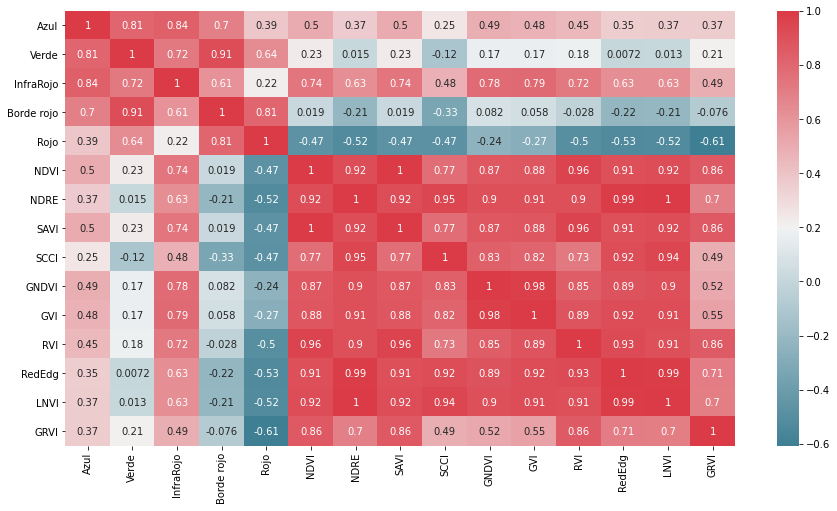

In [10]:
Variables_Explicativas=dataset2.iloc[:,5:20]
Variables_Explicativas2=dataset2.iloc[:,28:]

corr1 = Variables_Explicativas.corr()
corr2 = Variables_Explicativas2.corr()

##fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 8))

#ax0.set_title('Correlacion entre bandas e indices')
plt.figure(figsize=(15,8))
sns.heatmap(corr1, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True), #ax=ax0,)



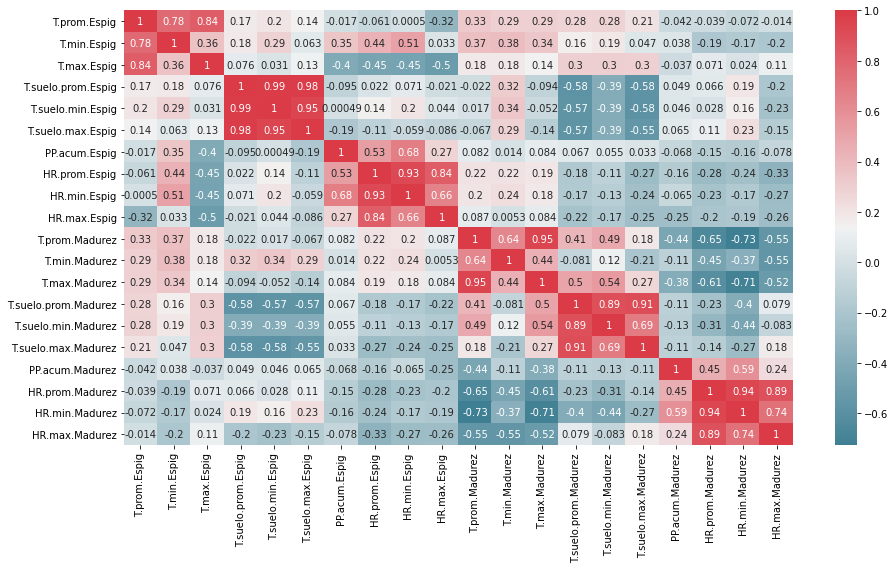

In [11]:
##ax1.set_title('Correlacion entre variables climaticas')

plt.figure(figsize=(15,8))
sns.heatmap(corr2,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True) #ax=ax1)

A partir de la información previa creamos dos datasets. El primero comprende los features derivados de imagenes por drones. El segundo abarca adicionalmente los features climáticos y otros.

Como se puede observar en el primer mapa de calor los indices estan, algunos, muy correlaciones. Incluso algunos se calculan a partir de otros. Pero a su vez estos explican cosas distintas en cuanto a la vegetacion.

Y en el segundo grafico vemos las correlaciones entre las variables climaticas, tambien vemos que existen altas correlaciones.

En terminos generales se remueven de ambos datasets 

- Promedios de las distintas variables dejando solo el maximo y minimo.

- La variable "ZADOCK" que son las etiquetas o grupos que queremos estimar.

- Los indices vegetativos LNVI, SAVI GVI

- Variables que tienen comportamiento dicotomico: "F.Siembra,Ciclos,Roya_cat,Fusariosis_cat,ManchasFoliares_cat"


- DRON DATASET

In [12]:
dropped = ['RDTO', 'ZADOCK','T.prom.Espig','T.suelo.prom.Espig','HR.prom.Espig','T.prom.Madurez','T.suelo.prom.Madurez','HR.prom.Madurez', "Adversidades",
                       'F.Siembra','Ciclos','Roya_cat','Fusariosis_cat','ManchasFoliares_cat', "Aspecto", "Carbon_cat", "PP.acum.Espig", "PP.acum.Madurez", 'Dias.entre.fechas', 
                        'T.min.Espig', 'T.max.Espig',
       'T.suelo.min.Espig', 'T.suelo.max.Espig', 'HR.min.Espig',
       'HR.max.Espig', 'T.min.Madurez', 'T.max.Madurez', 'T.suelo.min.Madurez',
       'T.suelo.max.Madurez', 'HR.min.Madurez', 'HR.max.Madurez', 'LNVI', 'SAVI', 'GVI', 'Variedad','Azul',	'Verde',	'InfraRojo',	'Borde rojo',	'Rojo']

dataset_dron=dataset2.drop(dropped ,axis=1)
dataset_dron.head()

,NDVI,NDRE,SCCI,GNDVI,RVI,RedEdg,GRVI,MGRVI
0,0.6343,0.2866,0.4518,0.6320,4.4691,1.8036,0.00375,0.00750
1,0.5968,0.2749,0.4606,0.6491,3.9605,1.7583,-0.08540,-0.16970
2,0.6205,0.2971,0.4788,0.6525,4.2704,1.8455,-0.05380,-0.10740
3,0.6347,0.2544,0.4008,0.6246,4.4756,1.6826,0.01677,0.03354
4,0.5794,0.2201,0.3799,0.6142,3.7561,1.5647,-0.05390,-0.10760


- DRON + WEATHER DATASET

In [13]:
dropped_2 = ['RDTO', 'ZADOCK','T.prom.Espig','T.suelo.prom.Espig','HR.prom.Espig','T.prom.Madurez','T.suelo.prom.Madurez','HR.prom.Madurez', "Adversidades",
                       'F.Siembra','Ciclos','Roya_cat','Fusariosis_cat','ManchasFoliares_cat', "Aspecto", "Carbon_cat",  'Dias.entre.fechas', 
                        'T.max.Espig',
       'T.suelo.max.Espig', 
       'HR.max.Espig',  'T.max.Madurez', 
       'T.suelo.max.Madurez',  'HR.max.Madurez', 'LNVI', 'SAVI', 'GVI', 'Variedad','Azul',	'Verde',	'InfraRojo',	'Borde rojo',	'Rojo']

dataset_weather=dataset2.drop(dropped_2 ,axis=1)
dataset_weather.head()

,NDVI,NDRE,SCCI,GNDVI,RVI,RedEdg,GRVI,MGRVI,T.min.Espig,T.suelo.min.Espig,PP.acum.Espig,HR.min.Espig,T.min.Madurez,T.suelo.min.Madurez,PP.acum.Madurez,HR.min.Madurez
0,0.6343,0.2866,0.4518,0.6320,4.4691,1.8036,0.00375,0.00750,14.15,4.0,0.0,18.82,12.55,-22.0,0.0,21.18
1,0.5968,0.2749,0.4606,0.6491,3.9605,1.7583,-0.08540,-0.16970,14.15,4.0,0.0,18.82,12.55,-22.0,0.0,21.18
2,0.6205,0.2971,0.4788,0.6525,4.2704,1.8455,-0.05380,-0.10740,14.15,4.0,0.0,18.82,12.55,-22.0,0.0,21.18
3,0.6347,0.2544,0.4008,0.6246,4.4756,1.6826,0.01677,0.03354,14.15,4.0,0.0,18.82,12.55,-22.0,0.0,21.18
4,0.5794,0.2201,0.3799,0.6142,3.7561,1.5647,-0.05390,-0.10760,14.15,4.0,0.0,18.82,12.55,-22.0,0.0,21.18


1.5 **Creación de nuevos atributos**

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable Target. Por ejemplo, una variable que represente las modas de las variedades por parcelas, el cuadrado de los días entre fechas, entre otras las que les parezca que de importancia


 1.6  **Normalización de Atributos**

Estandarizar el dataset usando alguna de las técnicas vistas en clase para variables continuas dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Tanto para Kmeans como para PCA es necesario escalar los datos. Es necesario que los datos estén en la misma escala dado que mayor varianza implica mayor peso relativo, generando distorsiones. Primero se observan las distribuciones de las features.

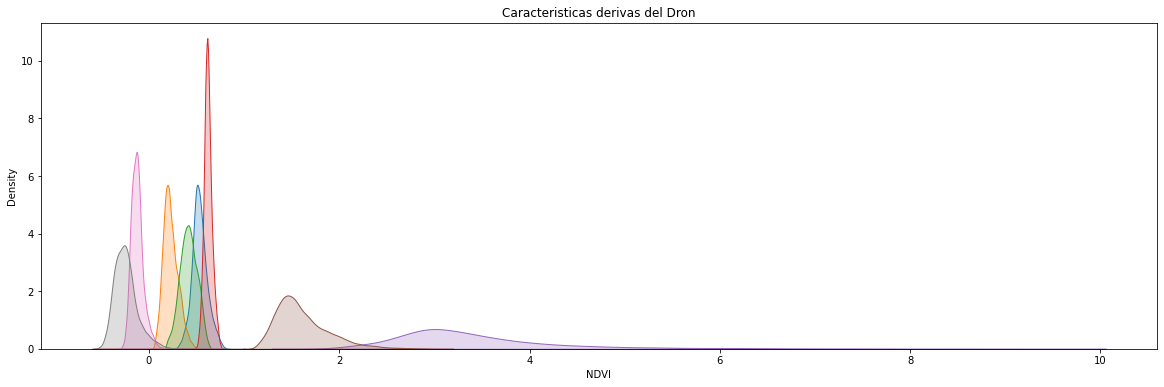

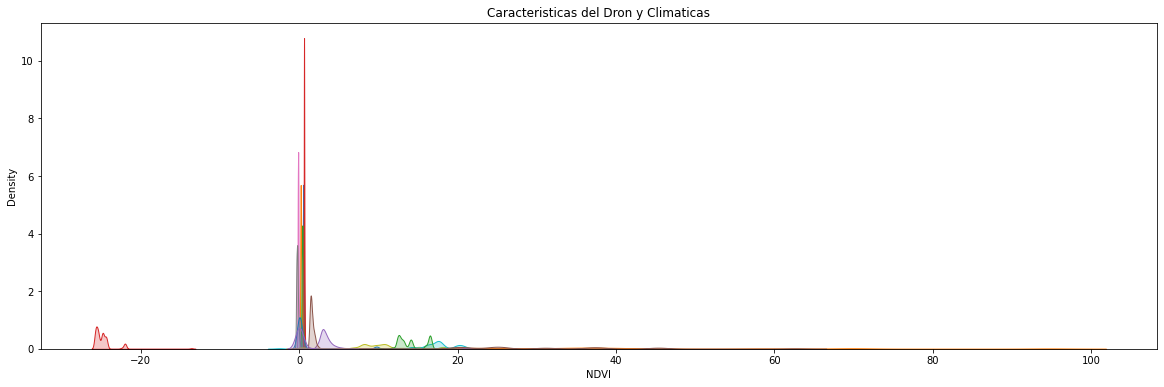

In [14]:
plt.figure(figsize=(20,6))
for col in dataset_dron.columns:
    sns.kdeplot(dataset_dron[col], shade=True)
plt.title('Caracteristicas derivas del Dron')
plt.show()

plt.figure(figsize=(20,6))
for col in dataset_weather.columns:
    sns.kdeplot(dataset_weather[col], shade=True)
plt.title('Caracteristicas del Dron y Climaticas')
plt.show()

See aprecia que la mayoría de los features no están en la misma escala, por lo cual no es posible identificar correctamente la distribucion. Probamos las siguientes tecnicas de escalamiento.

Log Scaling

Standard Scaling

Min-Max Scaling

In [15]:
indices = list(dataset_dron.columns)
variables = list(dataset_weather.columns)

In [16]:
scaler= StandardScaler()
minmax = MinMaxScaler()
#1 Log Scaling
log_indices = np.log(dataset_dron)
log_mix= np.log(dataset_weather)

#2 Standard Scaling
scaled_indices = scaler.fit_transform(dataset_dron)
scaled_indices_df= pd.DataFrame(scaled_indices, columns= indices)

scaled_mix= scaler.fit_transform(dataset_weather)
scaled_mix_df= pd.DataFrame(scaled_mix,columns= variables)

#3 Min-Max Scaling
minmax_indices = minmax.fit_transform(dataset_dron)
minmax_indices = pd.DataFrame(minmax_indices, columns= indices)

minmax_mix = minmax.fit_transform(dataset_weather)
minmax_mix = pd.DataFrame(minmax_indices, columns= variables)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



In [17]:
def plot_transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



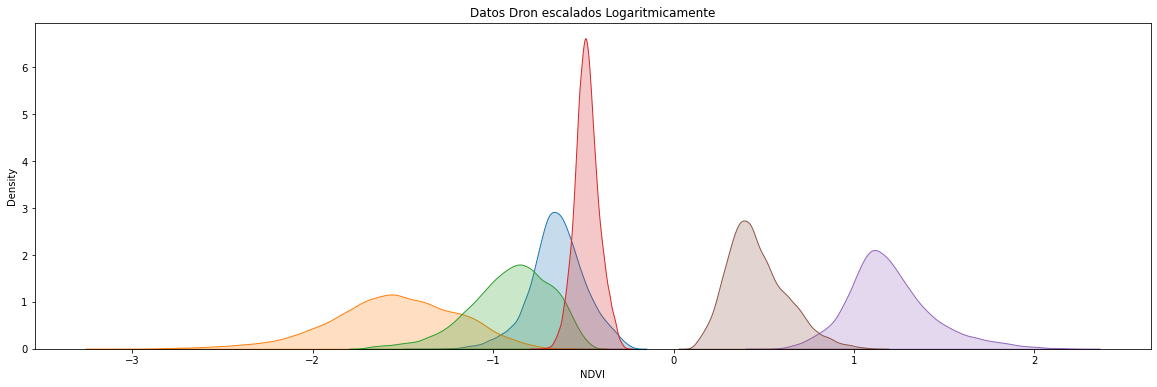

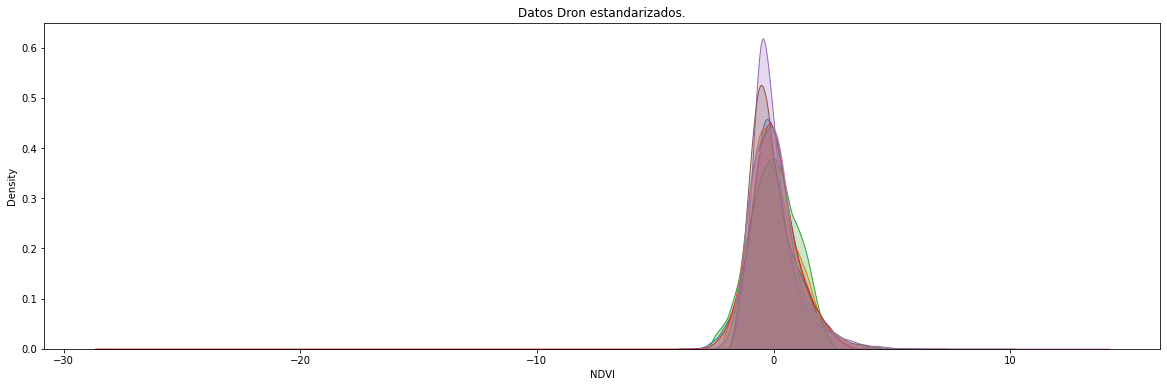

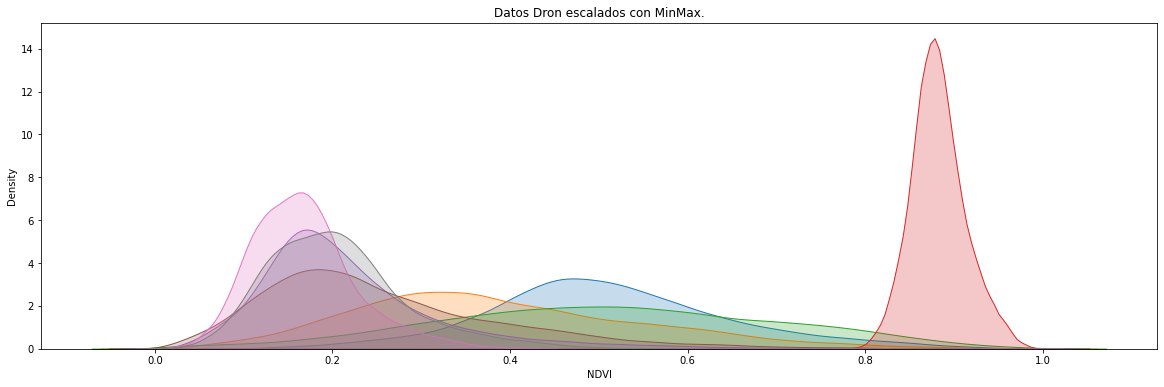

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



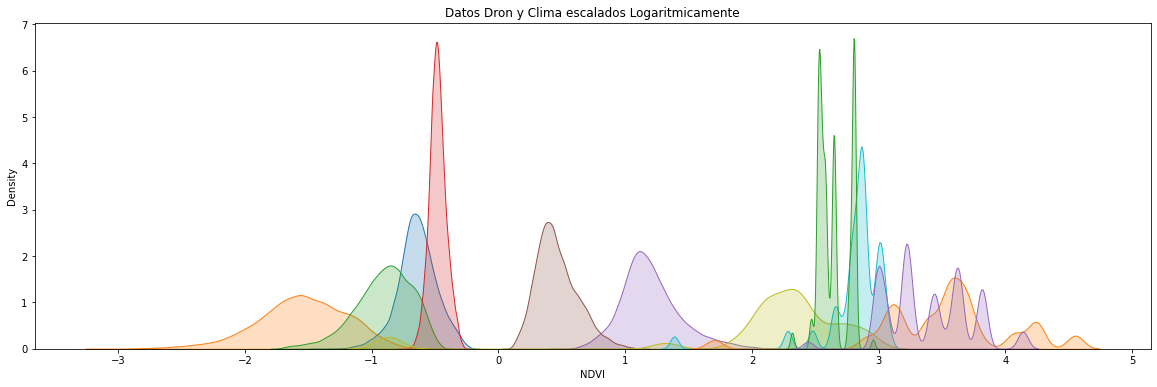

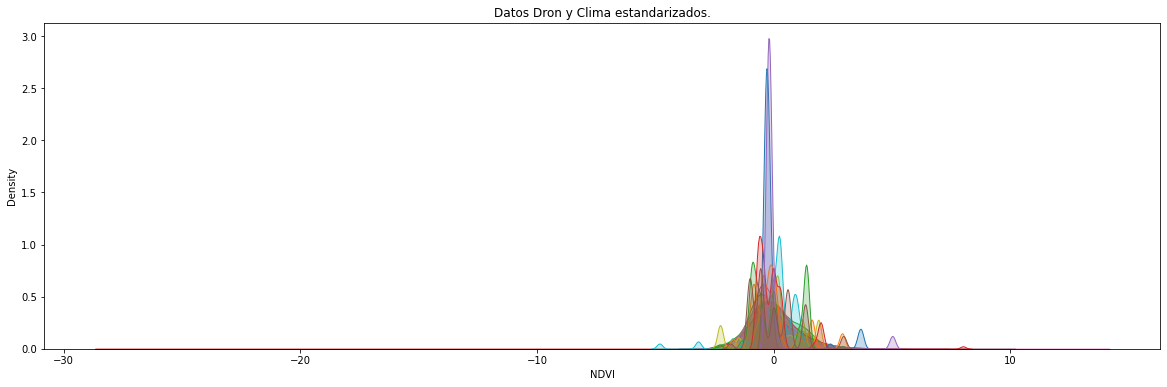

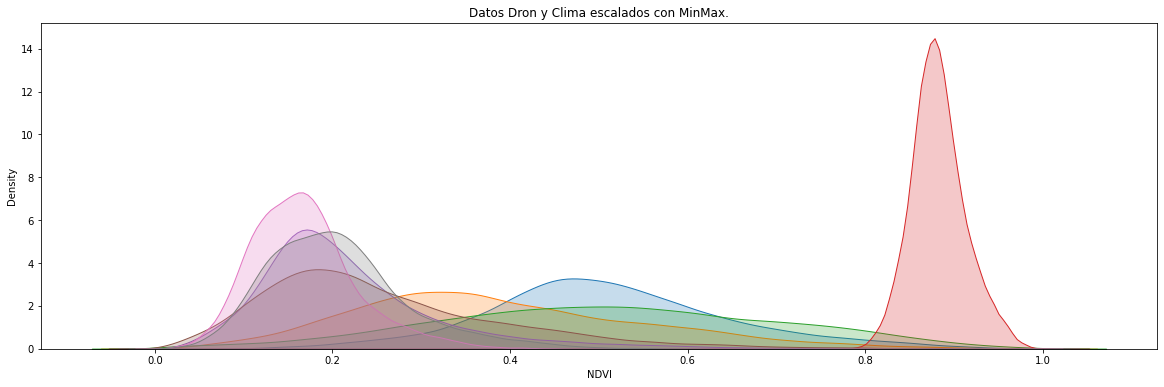

In [18]:
plot_transformed_data(log_indices)
plt.title('Datos Dron escalados Logaritmicamente')
plt.show()

plot_transformed_data(scaled_indices_df)
plt.title('Datos Dron estandarizados.')
plt.show()

plot_transformed_data(minmax_indices)
plt.title('Datos Dron escalados con MinMax.')
plt.show()

plot_transformed_data(log_mix)
plt.title('Datos Dron y Clima escalados Logaritmicamente')
plt.show()

plot_transformed_data(scaled_mix_df)
plt.title('Datos Dron y Clima estandarizados.')
plt.show()

plot_transformed_data(minmax_mix)
plt.title('Datos Dron y Clima escalados con MinMax.')
plt.show()



A partir de los graficos obtenidos, se decide trabajar con Standard Scaling.

# 2.Aprendizaje no Supervisado#

Guía:

-2.1 PCA with Dron Features

-2.2 Kmeans with Dron Features

-2.2 MeansShif with Dron Features



### *2.1* **PCA with Dron Features**

 DescomposiCión de Variables: Principal Component Analysis.A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

- Dado que el Principal Components Analysis realiza combinaciones lineales de variables para obtener nuevos vectores (eigenvalues) que capturen las direcciones de máxima variabilidad de los datos, se remueven los índices vegetativos en tanto estas variables ya son en si mismas combinaciones linales de las bandas espectrales.

In [19]:
pca = PCA(n_components=8, random_state=1).fit(scaled_indices_df)
    
dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(scaled_indices_df.columns))
components.index = dimensions

In [20]:
components.T

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
NDVI,0.3792,0.0867,-0.2550,-0.4796,0.3474,0.5667,-0.1524,0.2978
NDRE,0.3750,-0.2215,0.2136,0.0139,0.2340,-0.0077,0.8417,-0.0354
SCCI,0.3288,-0.4404,0.5769,-0.2543,-0.4651,0.0948,-0.2737,0.0160
GNDVI,0.3407,-0.3588,-0.6300,-0.2430,-0.1411,-0.4864,-0.0559,-0.1988
RVI,0.3754,0.1108,-0.3016,0.5895,-0.4974,0.3905,0.0729,0.0552
RedEdg,0.3745,-0.1902,0.1542,0.5206,0.5647,-0.1759,-0.4229,0.0086
GRVI,0.3239,0.5356,0.1552,-0.1441,0.0145,0.0122,-0.0757,-0.7465
MGRVI,0.3245,0.5342,0.1442,-0.0818,-0.1478,-0.4996,0.0207,0.5568


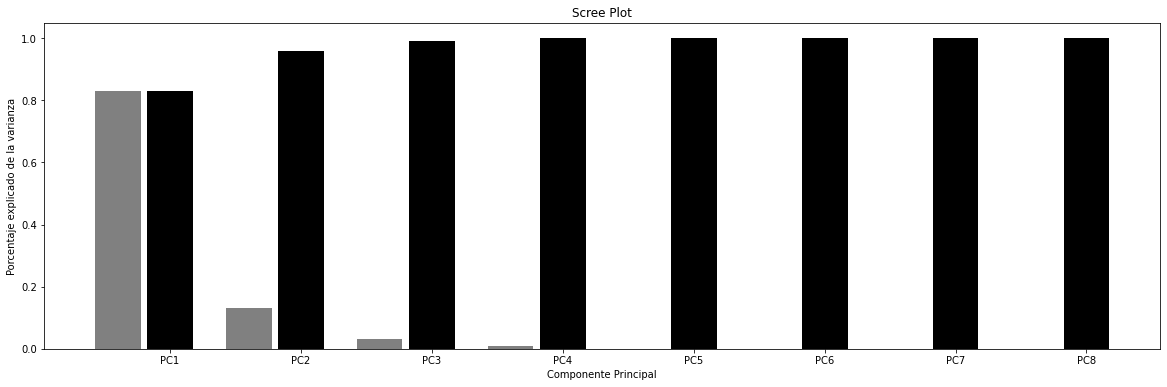

In [21]:
# PCA explained variance
per_var= np.round(pca.explained_variance_ratio_, decimals=2)
per_var_ac=np.round(pca.explained_variance_ratio_.cumsum(), decimals=2)
labels= ["PC" + str(x) for x in range(1, len(per_var)+1)]

x_ix1= np.arange(1, len(per_var)+1)
x_ix2= np.arange(1, len(per_var)+1)

plt.figure(figsize=(20,6))
plt.bar(x_ix1-0.2, height= per_var, tick_label=labels, color="grey", width=0.35)
plt.bar(x_ix1+0.2, height= per_var_ac, tick_label=labels, color= "black", width=0.35)
plt.ylabel("Porcentaje explicado de la varianza")
plt.xlabel("Componente Principal")
plt.title("Scree Plot")
plt.show()

Se observa que entre las primeras 3 componentes explican el 95%  de la variabilidad de los datos.

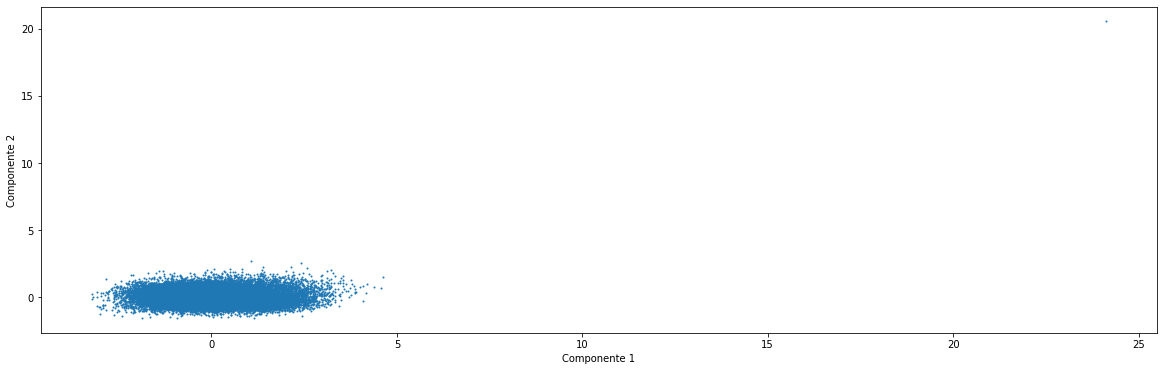

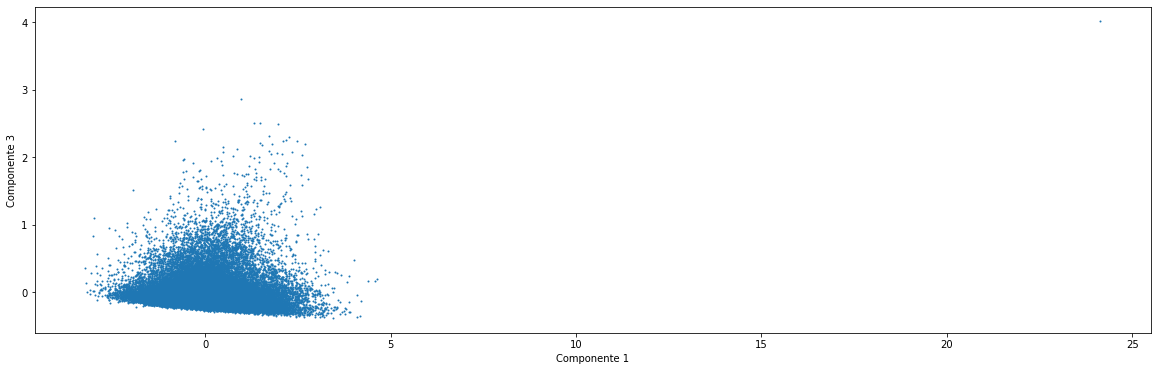

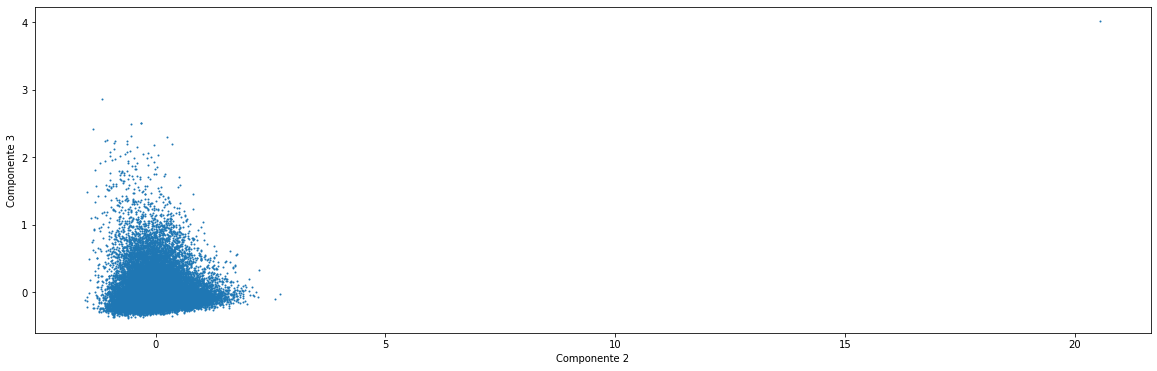

In [22]:
X_projected=pca.transform(scaled_indices)

variable1="Componente 1"
variable2="Componente 2"
variable3="Componente 3"

f1 = X_projected[:,1]
f2 = X_projected[:,2]
f3 = X_projected[:,3]

plt.figure(figsize=(20,6))
plt.scatter(f1, f2, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()
plt.figure(figsize=(20,6))
plt.scatter(f1, f3, s=1)
plt.xlabel(variable1)
plt.ylabel(variable3)
plt.show()
plt.figure(figsize=(20,6))
plt.scatter(f2, f3, s=1)
plt.xlabel(variable2)
plt.ylabel(variable3)
plt.show()

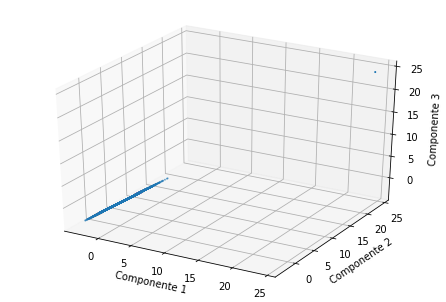

In [23]:
fig = plt.figure()
ax = Axes3D(fig)

variables=["Componente 1","Componente 2","Componente 3"]
ax.scatter(X_projected[:,1], X_projected[:,1], X_projected[:,1], s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

Vemos el pesos de los features en cada componente.

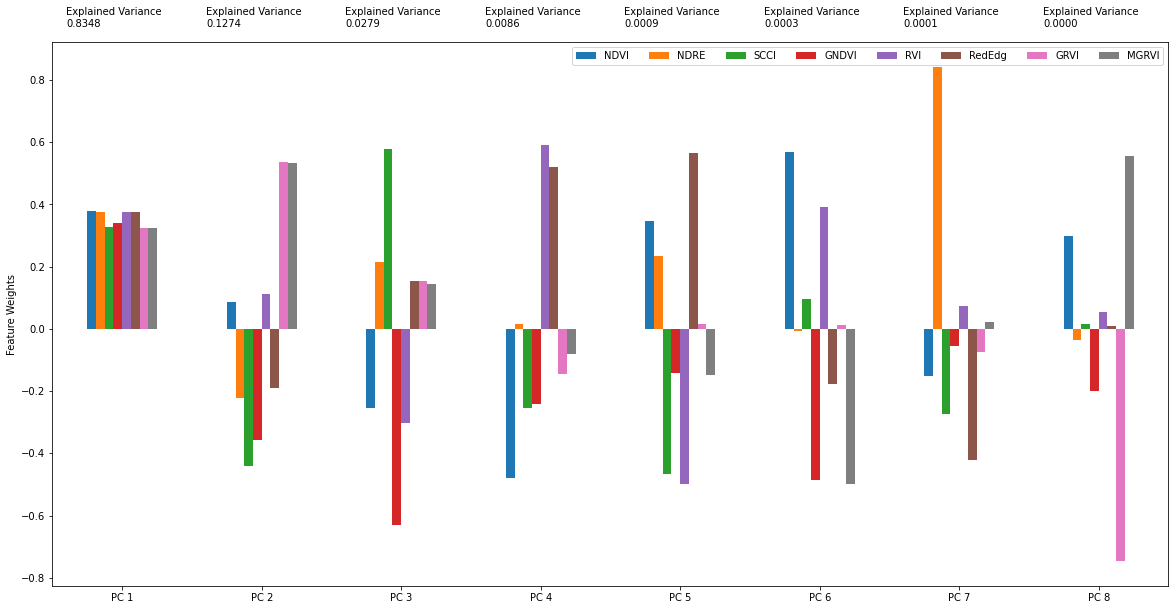

In [25]:
fig, ax = plt.subplots(figsize = (20,10))

components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)
plt.legend(loc='upper right', ncol=13)

# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
  ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

Aplicando Análisis de Silueta a los PC1, PC2 y PC3.

In [26]:
pca2 = PCA(n_components=3).fit(scaled_indices_df)
reduced_data = pca2.transform(scaled_indices)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

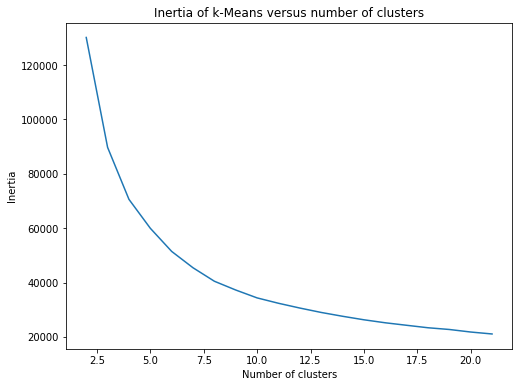

In [31]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(reduced_data).inertia_ for i in range(20)]

plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [32]:
# Número de clusters buscado
n_clust = 4

km2 = KMeans(n_clusters=n_clust)
km2.fit(reduced_data)

# Recuperacion de etiquetas
clusters2 = km2.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km2.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  70607.46199018022


In [33]:
def cluster(reduced_data,n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    
    return preds, centers

def silhouette_scorer(reduced_data,n_clusters):
    preds,_= cluster(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,15):
    score = silhouette_scorer(reduced_data,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))

Silhoutte Score for 2 cluster is 0.46749898222487707
Silhoutte Score for 3 cluster is 0.3670197432970056
Silhoutte Score for 4 cluster is 0.3216705462039097
Silhoutte Score for 5 cluster is 0.31879809751205895
Silhoutte Score for 6 cluster is 0.3046825454232422
Silhoutte Score for 7 cluster is 0.3070315281882504
Silhoutte Score for 8 cluster is 0.2974415019324952
Silhoutte Score for 9 cluster is 0.294746162617867
Silhoutte Score for 10 cluster is 0.2801786938613914
Silhoutte Score for 11 cluster is 0.2777969890028849
Silhoutte Score for 12 cluster is 0.26370100165528804
Silhoutte Score for 13 cluster is 0.26411438951645705
Silhoutte Score for 14 cluster is 0.26230651333112326


El análisis de Silueta determina que el número óptimo de clusters es 4

For n_clusters = 2 The average silhouette_score is : 0.46797485263854127
For n_clusters = 3 The average silhouette_score is : 0.3658573529219146
For n_clusters = 4 The average silhouette_score is : 0.3216802352813378
For n_clusters = 5 The average silhouette_score is : 0.3187841881872234


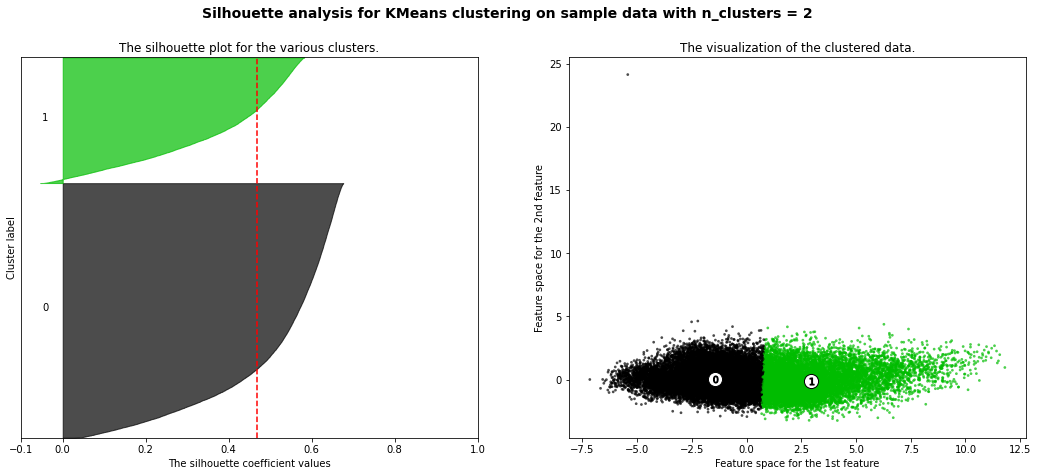

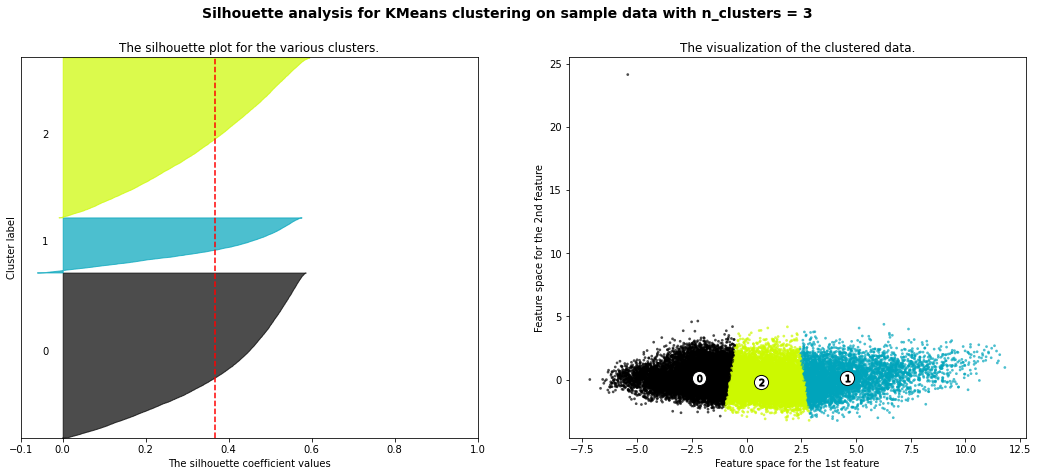

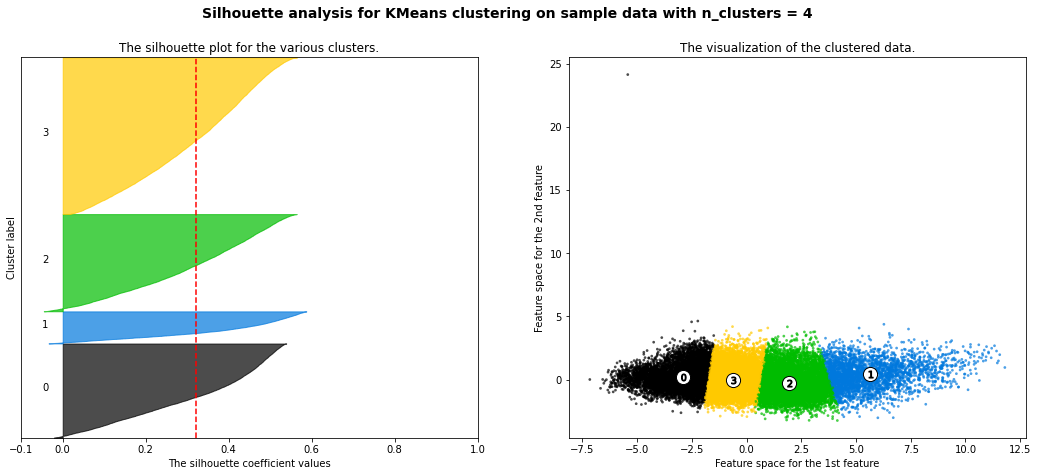

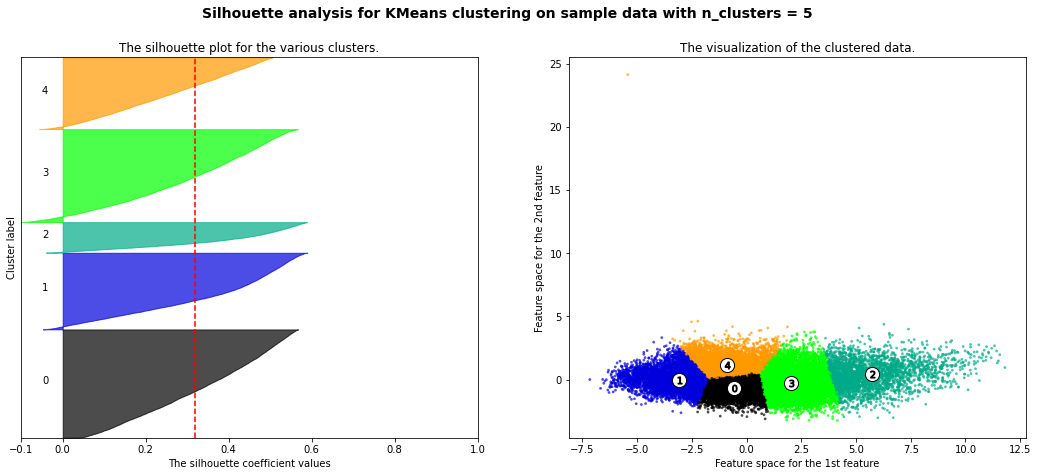

In [34]:
X= reduced_data

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [35]:
len(clusters2)==len(dataset2.ZADOCK)

True

In [36]:
### Re categorizamos la escala zadock para realizar una comparacion de los resultados
pd.unique(dataset2["ZADOCK"])

array([4.1, 5.1, 4.3, 3.9, 4.5, 5.5, 4.7, 6.1, 6.3, 6.9, 6.7, 6.5, 6.6,
       5.8, 5.9, 5.4, 5.7, 5.3])

Basandonos el la siguiente tabla que explica los estado fenologicos se hace el siguete agrupamiento.

# ![title](424-4247508_crecimiento-y-desarrollo-del-trigo-escala-de-zadoks.png)

In [37]:
Enc=[3.9]
Vaina=[4.1,4.3,4.5,4.7] 
Espigado=[5.1,5.3,5.4,5.5,5.7,5.8,5.9]
Antesis=[6.1,6.3,6.5,6.6,6.7,6.9]

def pos2(ZADOCK):
    if ZADOCK in Enc:
        return 'Enc'
    
    elif ZADOCK in Vaina:
        return 'Vaina'
    
    elif ZADOCK in Espigado:
        return 'Espigado'
    
    elif ZADOCK in Antesis:
        return 'Antesis'
    

dataset2["ZADOCK2"]=dataset2["ZADOCK"].apply(lambda x: pos2(x))
dataset2

,RDTO,ZADOCK,F.Siembra,Ciclos,Variedad,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Adversidades,Dias.entre.fechas,Aspecto,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez,ZADOCK2
0,5071,4.1,0,1,1,61500,15240,67600,37480,15126,0.6343,0.2866,0.9514,0.4518,0.6320,4.4356,4.4691,1.8036,0.5898,0.00375,0.00750,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13,Vaina
1,5071,4.1,0,1,1,51200,12040,56600,32190,14291,0.5968,0.2749,0.8952,0.4606,0.6491,4.7009,3.9605,1.7583,0.5643,-0.08540,-0.16970,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13,Vaina
2,5071,4.1,0,1,1,49200,11100,52800,28610,12364,0.6205,0.2971,0.9307,0.4788,0.6525,4.7567,4.2704,1.8455,0.6127,-0.05380,-0.10740,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13,Vaina
3,5071,4.1,0,1,1,60800,14210,61500,36550,13741,0.6347,0.2544,0.9521,0.4008,0.6246,4.3279,4.4756,1.6826,0.5203,0.01677,0.03354,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13,Vaina
4,5071,4.1,0,1,1,60800,17300,72400,46270,19275,0.5794,0.2201,0.8692,0.3799,0.6142,4.1849,3.7561,1.5647,0.4477,-0.05390,-0.10760,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13,Vaina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,4089,6.9,1,0,20,54500,11010,55600,26940,13987,0.5979,0.3472,0.8969,0.5806,0.6694,5.0499,3.9751,2.0638,0.7245,-0.11900,-0.23480,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80,Antesis
35066,4089,6.9,1,0,20,72800,14900,91300,38220,17056,0.6851,0.4098,1.0277,0.5981,0.7193,6.1275,5.3529,2.3888,0.8707,-0.06740,-0.13430,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80,Antesis
35067,4089,6.9,1,0,20,69200,14480,83100,35950,17149,0.6578,0.3960,0.9868,0.6020,0.7032,5.7389,4.8457,2.3115,0.8379,-0.08430,-0.16750,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80,Antesis
35068,4089,6.9,1,0,20,61000,11930,61900,28170,14329,0.6240,0.3744,0.9360,0.6000,0.6768,5.1886,4.3199,2.1973,0.7872,-0.09130,-0.18120,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80,Antesis


In [38]:
dataset2["ZADOCK2"].isna().sum()

0

In [39]:
estado=dataset2["ZADOCK2"]

In [40]:
df_labels = pd.DataFrame({"labels": clusters2, "Estado": estado })


In [41]:
tabla=pd.crosstab(df_labels.labels, df_labels.Estado)
tabla

Estado,Antesis,Enc,Espigado,Vaina
labels,,,,
0,1945,109,4817,1695
1,6427,86,1610,902
2,6023,574,5101,2807
3,1930,24,770,250


## 2.2 **K-MEANS CLUSTERING with Dron Features**

Aplicar K-Means tanto al dataset originales.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

Calcular las métricas pertinentes sobre los clusters resultantes.

Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?

Agregar a los dataset originales el cluster resultante de los modelos.

Graficar diferentes variables de interés por cluster y por clase, y compararlos.

Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide.

Obtener conclusiones.

Contrastar la clasificación en clusters con las etiquetas de clases (Zadoks), tanto gráfica como analíticamente. 

##Análisis exploratorio previo

In [48]:
##Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 20 clusters
scores = [KMeans(n_clusters=i+2).fit(scaled_indices).inertia_ for i in range(20)]


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

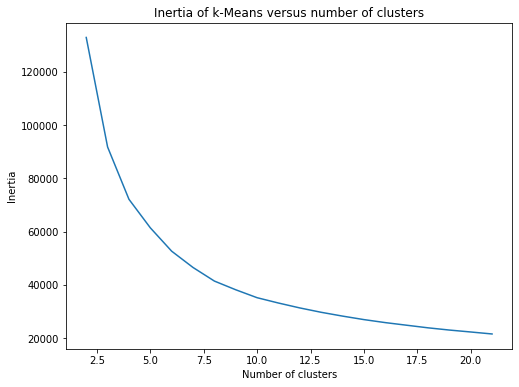

In [49]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 22), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [50]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(scaled_indices)

# Recuperacion de etiquetas
clustersKM = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  72127.76246908536


In [51]:
df_labelsKM = pd.DataFrame({"labels": clustersKM, "Estado": estado })

In [52]:
tablaKM=pd.crosstab(df_labels.labels, df_labels.Estado)
tablaKM

Estado,Antesis,Enc,Espigado,Vaina
labels,,,,
0,1945,109,4817,1695
1,6427,86,1610,902
2,6023,574,5101,2807
3,1930,24,770,250


Utilizando Kmeans, con 4 clusters (óptimo), vemos que el algoritmo no es capaz de diferenciar bien los estados fenologicos, esto puede deberse a las variables con las que trabajamos. 
El resultado obtenido con el Kmeans sobre los datos originales estandarizados es muy similar al resultado obtenido al aplicar Kmeans a las componentes obtenidas mediante un PCA. 

In [55]:
dron_cols=list(dataset_dron.columns)

In [58]:
data=[]
bool_crack=dataset2["RDTO"] > 4588
bool_no_crack=dataset2["RDTO"]< 4588


#Eligo dos números entre 0 y  de n_skills-1
feature_x_axis=dron_cols[3]
feature_y_axis=dron_cols[5]


kmean_clusters = go.Scatter(x=dataset2[feature_x_axis], y=dataset2[feature_y_axis],
                           mode='markers',
                        text=dataset2.loc[:,'ZADOCK2'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )



data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=feature_x_axis),
                yaxis=dict(title=feature_y_axis),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)


iplot(fig)

For n_clusters = 2 The average silhouette_score is : 0.46547527744741224
For n_clusters = 3 The average silhouette_score is : 0.36589389654778304
For n_clusters = 4 The average silhouette_score is : 0.32235919288820275
For n_clusters = 5 The average silhouette_score is : 0.3190745204701425
For n_clusters = 6 The average silhouette_score is : 0.3053199313336723


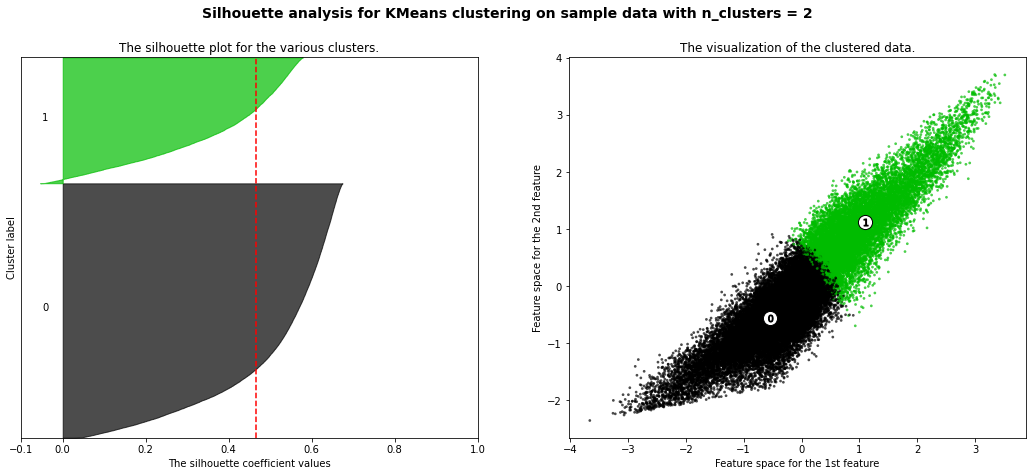

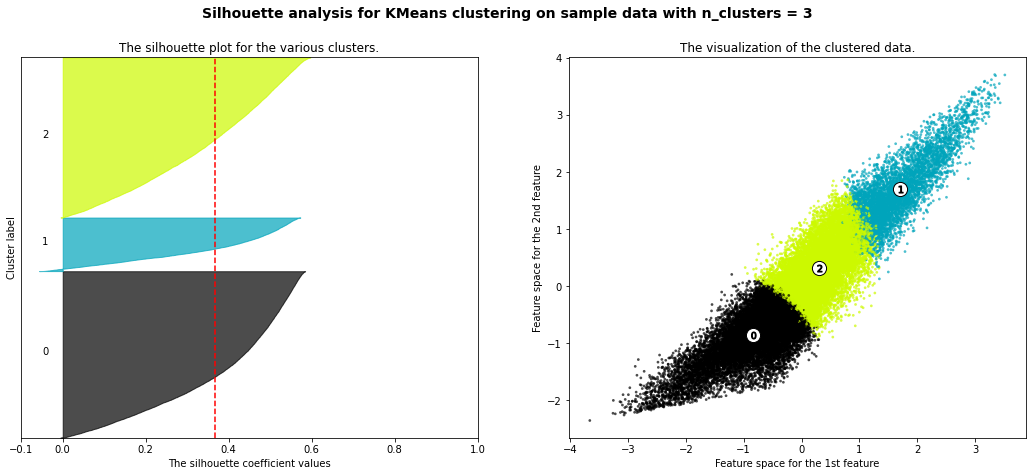

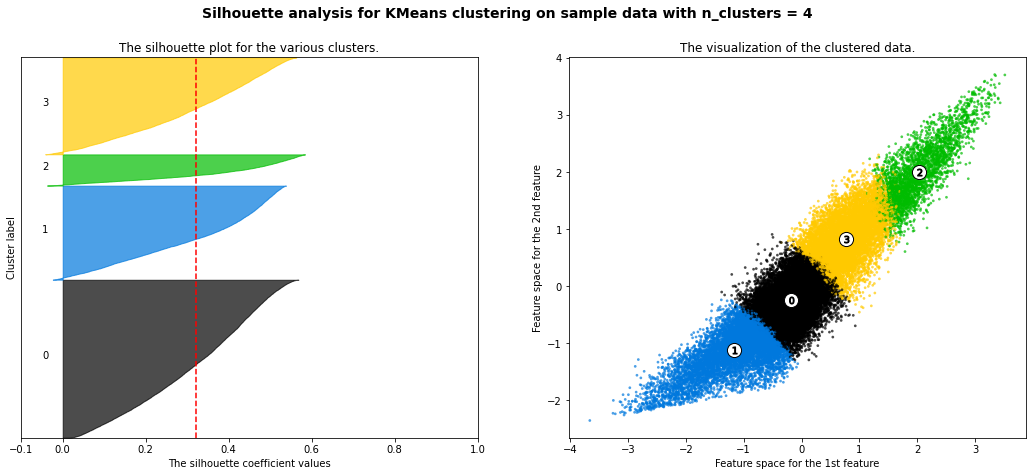

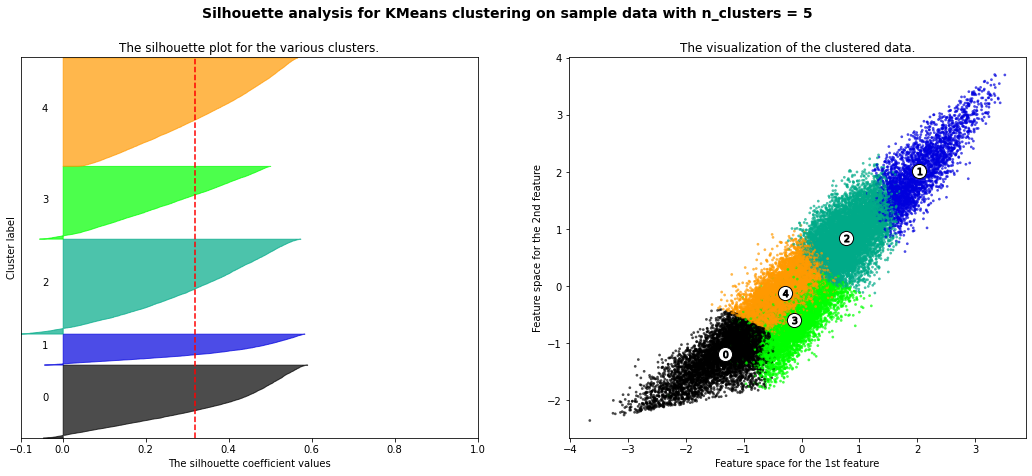

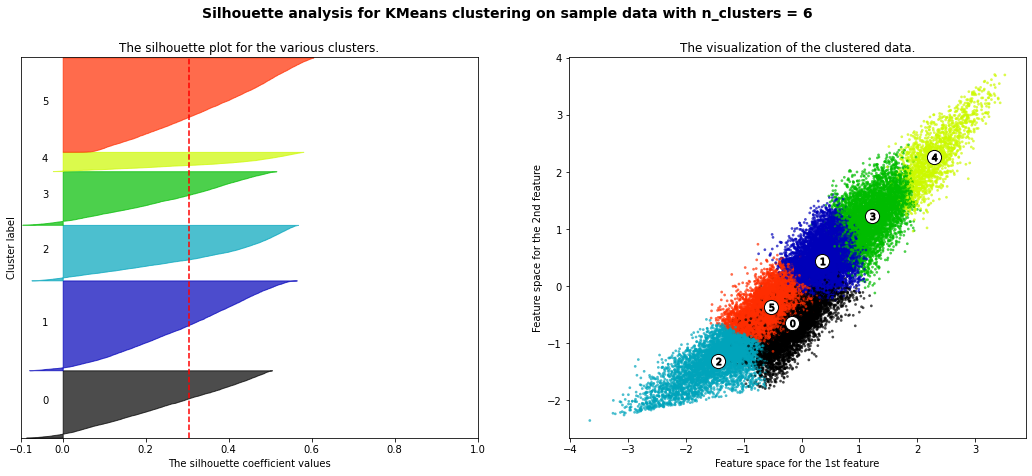

In [59]:
X= scaled_indices

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#3. Opcional#


Elegir e implementar otro algoritmo de clustering (de los vistos en clases) y analizar los resultados en base a la métrica que corresponda. Intentar responder las siguientes preguntas disparadoras:
¿Son diferentes los resultados con respecto al punto anterior?
¿Considera que un método es mejor que otro? ¿Por qué?



## 2.3 Mean Shift with Dron Features

In [60]:
for bandw in np.arange(2, 15, 1):

  ms = MeanShift(bandwidth=bandw, bin_seeding=True)

  ms.fit(scaled_indices, y=None)

  clusters2 = ms.labels_
  cluster_centers = ms.cluster_centers_

  labels_unique = np.unique(clusters2)
  n_clusters_ = len(labels_unique)

  print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 1
Numero estimado de clusters para Mean Shift : 1
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2


Probando diferentes bandwidth, el nro de clusters esta entre 1 y 2. 
Para definir cuantos clusters vamos a calcular usamos la funcion estimate_bandwidth

In [61]:
bandwidth = estimate_bandwidth(scaled_indices, quantile=0.5, n_samples=1000)
print(bandwidth)

3.1438298921440526


In [109]:
# Fit Mean Shift with Scikit
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(scaled_indices)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

 

In [120]:
n_clusters_

 

2

In [121]:
# Predict the cluster for all the samples
P = ms.predict(scaled_indices)
print(P)

[0 0 0 ... 0 0 0]


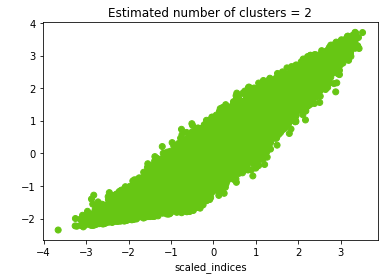

In [122]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
plt.scatter(scaled_indices[:,0], scaled_indices[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('scaled_indices')
plt.ylabel(' ')
plt.show()



## Conclusiones
Al probar los distintos metodos de agrupamiento, utilizando solamente las caracteristicas derivadas del a imagen del dron (Valores de las bandas y los indices calculados a partir de ellos), vemos que se generan 4 grupos (PCA con Kmeans, Kmeans). Dichos grupos presentan un mezcla de estados fenologicos, es decir que estas carecterisiticas no nos permiten distinguir la fenologia del cultivo de manera correcta. 
En cambio con el metodo de MeanShif no nos genera diferentes cluster. No encuentra agrupamientos, probamos con diferentes valores de bandwidth y el resultado es el mismo. Con la funcion estimate_bandwidth, cambiando el hiperparametro 'quantile' el resultado se mantiene, dando 1 Cluster. 

Otra cosa que nos parecio interesante, es que al realizar un PCA podemos reducir la espacialidad de 13 features a 3 CP, las cuales explican el 95% de la variabilidad total de los datos. 